In [2]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data_dir = '../data/internet/'
whle_dir = data_dir + 'ph_internet_whole/ph_fixedinternet_whole.shp'
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'

In [4]:
ph_fixed_tiles = gp.read_file(whle_dir).to_crs('+proj=cea')
centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')

In [5]:
ph_fixed_tiles.set_geometry(ph_fixed_tiles.geometry.centroid, inplace=True)
centroids_.set_geometry(centroids_.geometry.centroid, inplace=True)

In [54]:
internet_pts = ph_fixed_tiles.geometry
centroid_pts = centroids_.geometry

In [56]:
internet_pts

0        POINT (13423870.907 1787350.266)
1        POINT (13468510.132 1598226.878)
2        POINT (13485020.530 1612449.729)
3        POINT (13478294.072 1598796.119)
4        POINT (13483797.538 1608469.051)
                       ...               
54440    POINT (13522933.296 1590824.272)
54441    POINT (13722892.562 1503936.161)
54442    POINT (13811559.515 1103669.285)
54443     POINT (14002346.338 829542.043)
54444    POINT (13738179.968 1193585.862)
Name: geometry, Length: 54445, dtype: geometry

In [117]:
distance_set = []
for i in centroid_pts[10:30]:
    distances = []
    for j in internet_pts:
        distances.append(i.distance(j) <= 5000)
    distance_set.append(distances)

surrounding_pts = []
for ind, i in enumerate(distance_set):
    surrounding_pts.append(internet_pts[distance_set[ind]])
ave_speed_per_cluster = []
for i in surrounding_pts:
    speeds = []
    for _ in i:
        speeds.append(ph_fixed_tiles[ph_fixed_tiles.geometry == _]['avg_d_kbps'].item())
    ave_speed_per_cluster.append(np.mean(speeds))

KeyboardInterrupt: 

In [130]:
type(centroids_)

geopandas.geodataframe.GeoDataFrame

In [140]:
data_in_buffers.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,ID_0,ISO,NAME_ENGLI,...,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry,index_right
0,1323030111220000,18348,16735,69,322,59,0,179,PHL,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,POINT (13423870.907 1787350.266),384
159,1323030110313313,16949,16450,39,498,177,0,179,PHL,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,POINT (13423259.411 1789029.198),384
162,1323030111202011,19565,18685,22,2091,325,0,179,PHL,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,POINT (13425705.396 1791826.820),384
166,1323030111202131,14807,14427,21,146,86,0,179,PHL,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,POINT (13428151.381 1790707.861),384
331,1323030111202213,21333,20868,24,1439,229,0,179,PHL,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,POINT (13425705.396 1789029.198),384


In [ ]:
len(centroids_)

In [153]:
len(buffers_)

1214

In [152]:

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
for i in len(buffers_):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    intpoint_test.plot(ax=ax, color='purple', alpha=0.1)

In [8]:
from scipy.stats import skew, kurtosis

In [7]:
def summary_stat(series_, mean_arr, max_arr, min_arr, std_arr, median_arr, skew_arr, cov_arr, kurtosis_arr):
    mean_arr.append(np.mean(series_))
    max_arr.append(np.max(series_))
    min_arr.append(np.min(series_))
    std_arr.append(np.std(series_))
    median_arr.append(np.median(series_))
    skew_arr.append(skew(series_))
    cov_arr.append(np.cov(series_))
    kurtosis_arr.append(kurtosis(series_))

<AxesSubplot:>

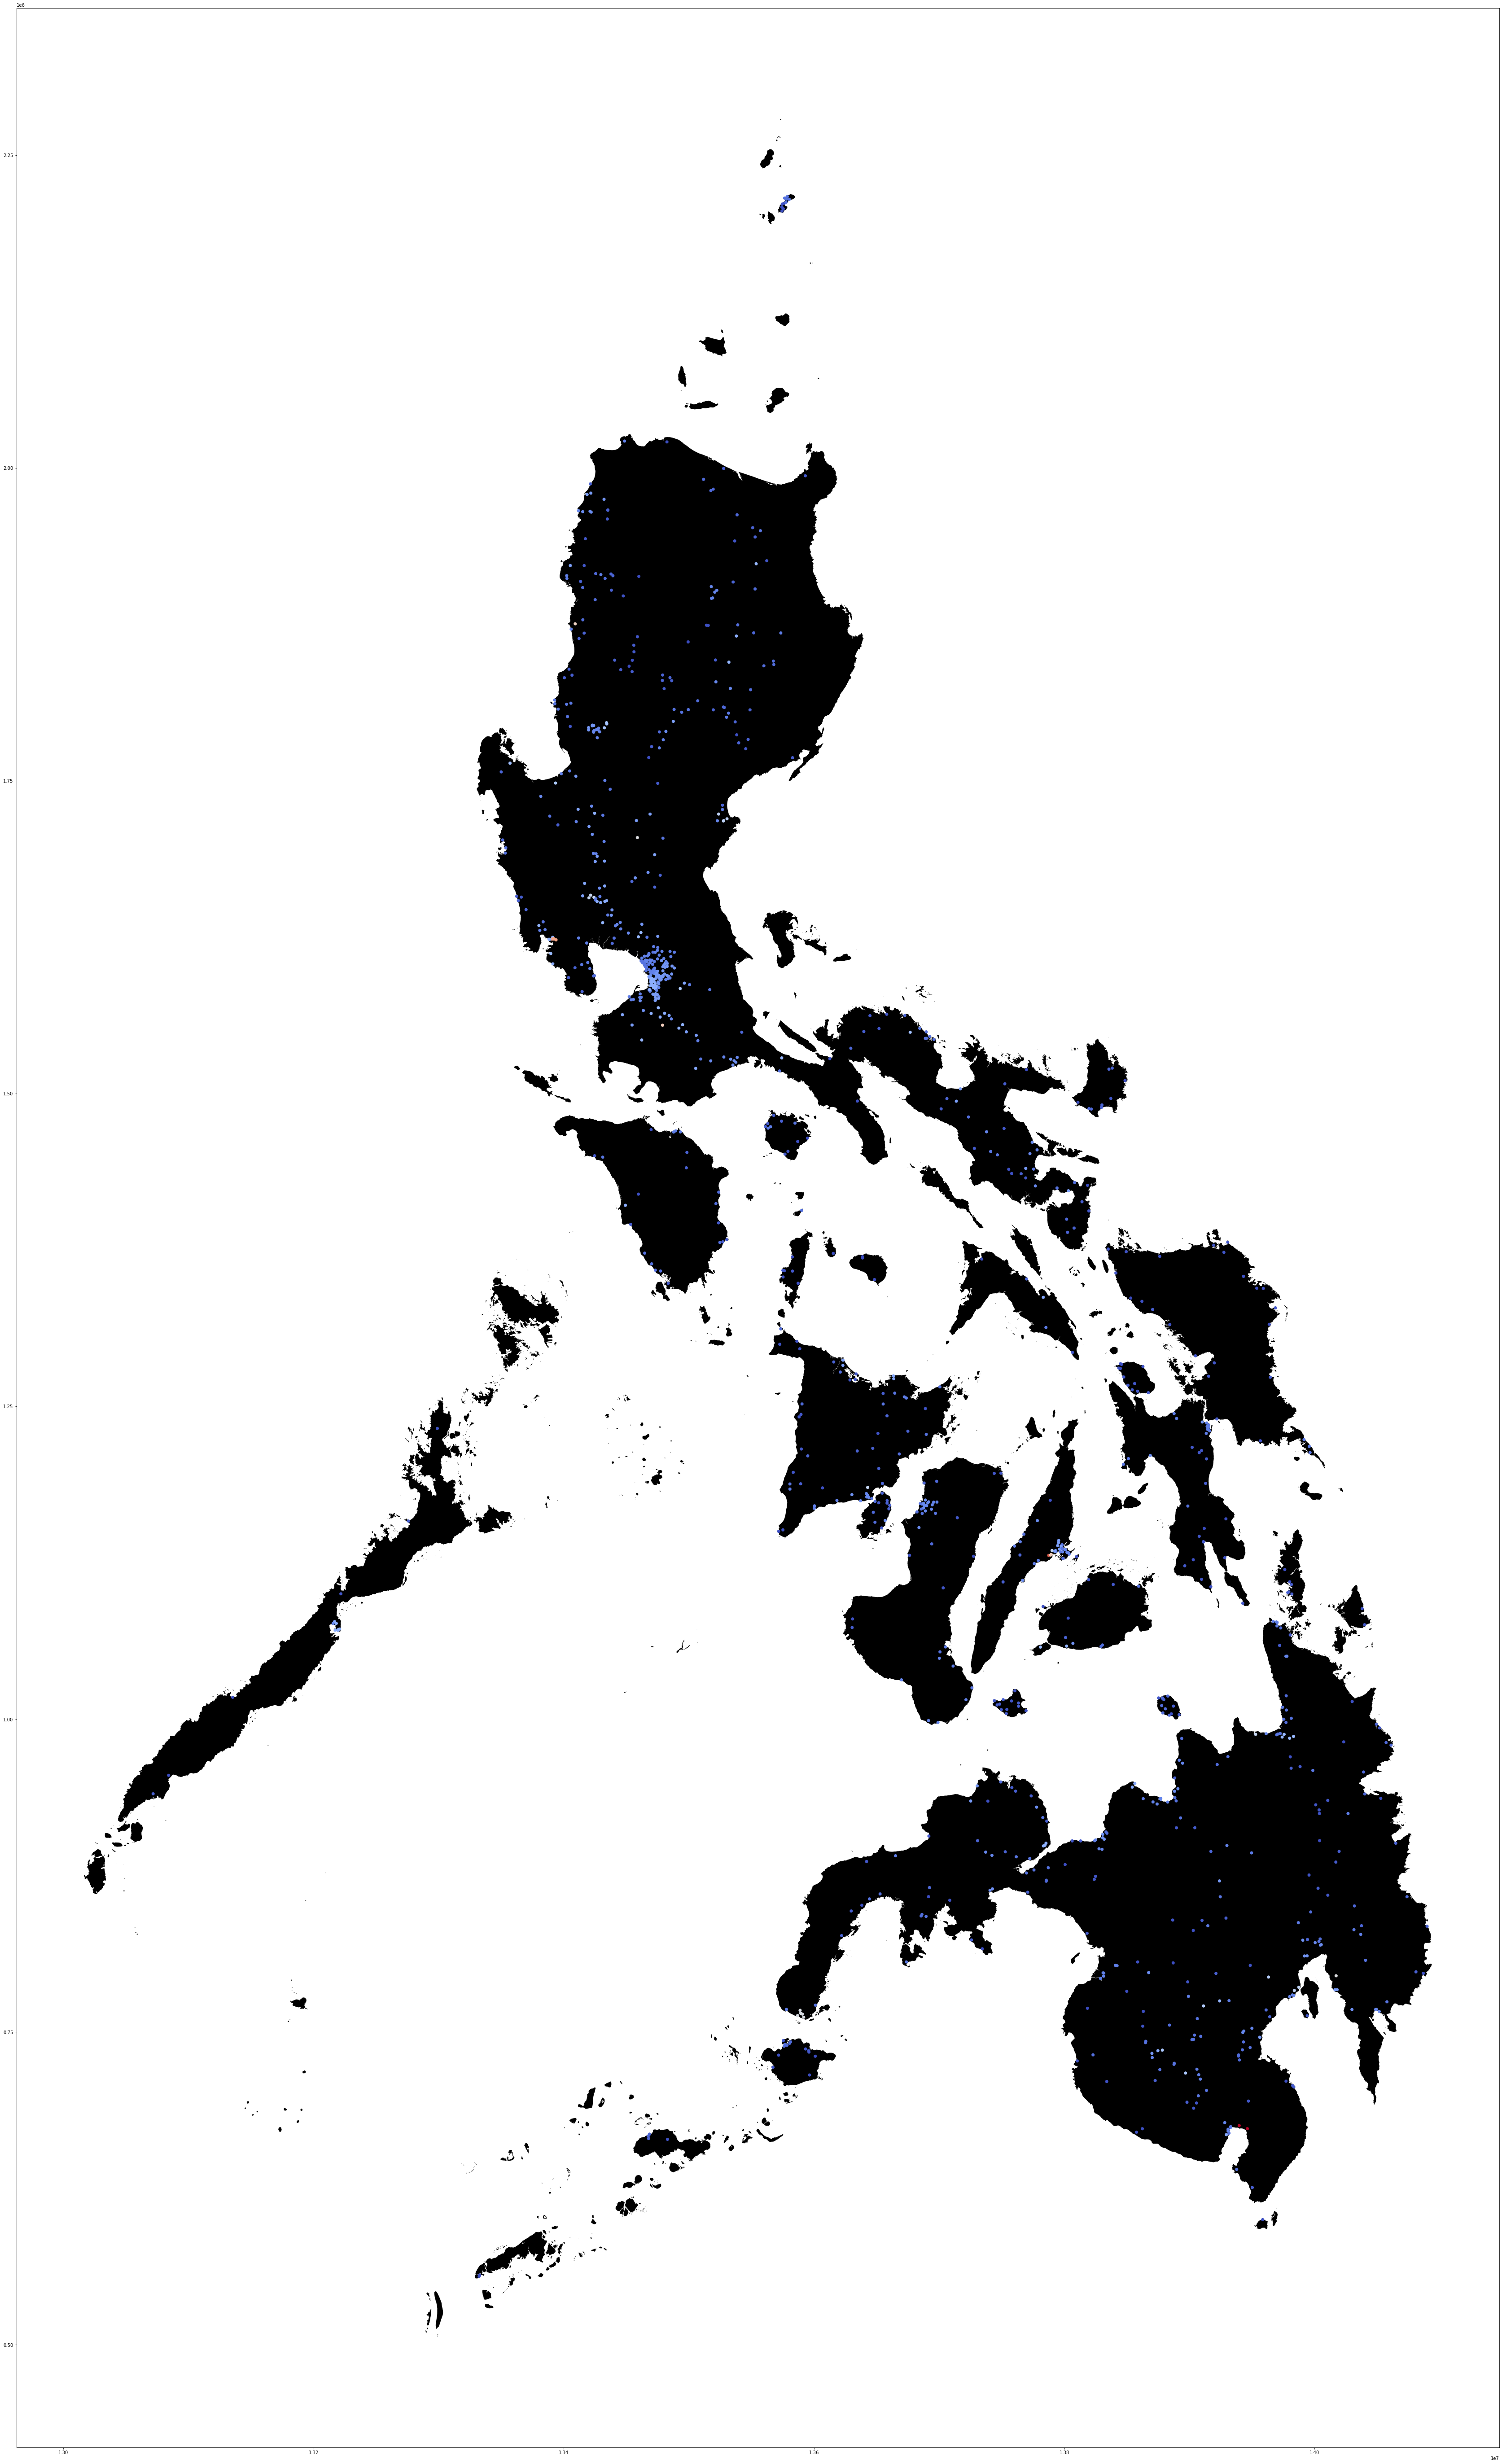

In [216]:
fig, ax = plt.subplots(figsize=(100, 100))

whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
whole_ph = gp.read_file(whole_ph_dir).to_crs('+proj=cea')
whole_ph.plot(ax=ax, color='black')

SCREAM = gp.GeoDataFrame(avg_d_kbps_cluster_mean, geometry=centroids_.geometry)
SCREAM.plot(ax=ax, column=0, cmap='coolwarm', legend=False, alpha=1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_18756/3086358300.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value

<AxesSubplot:>

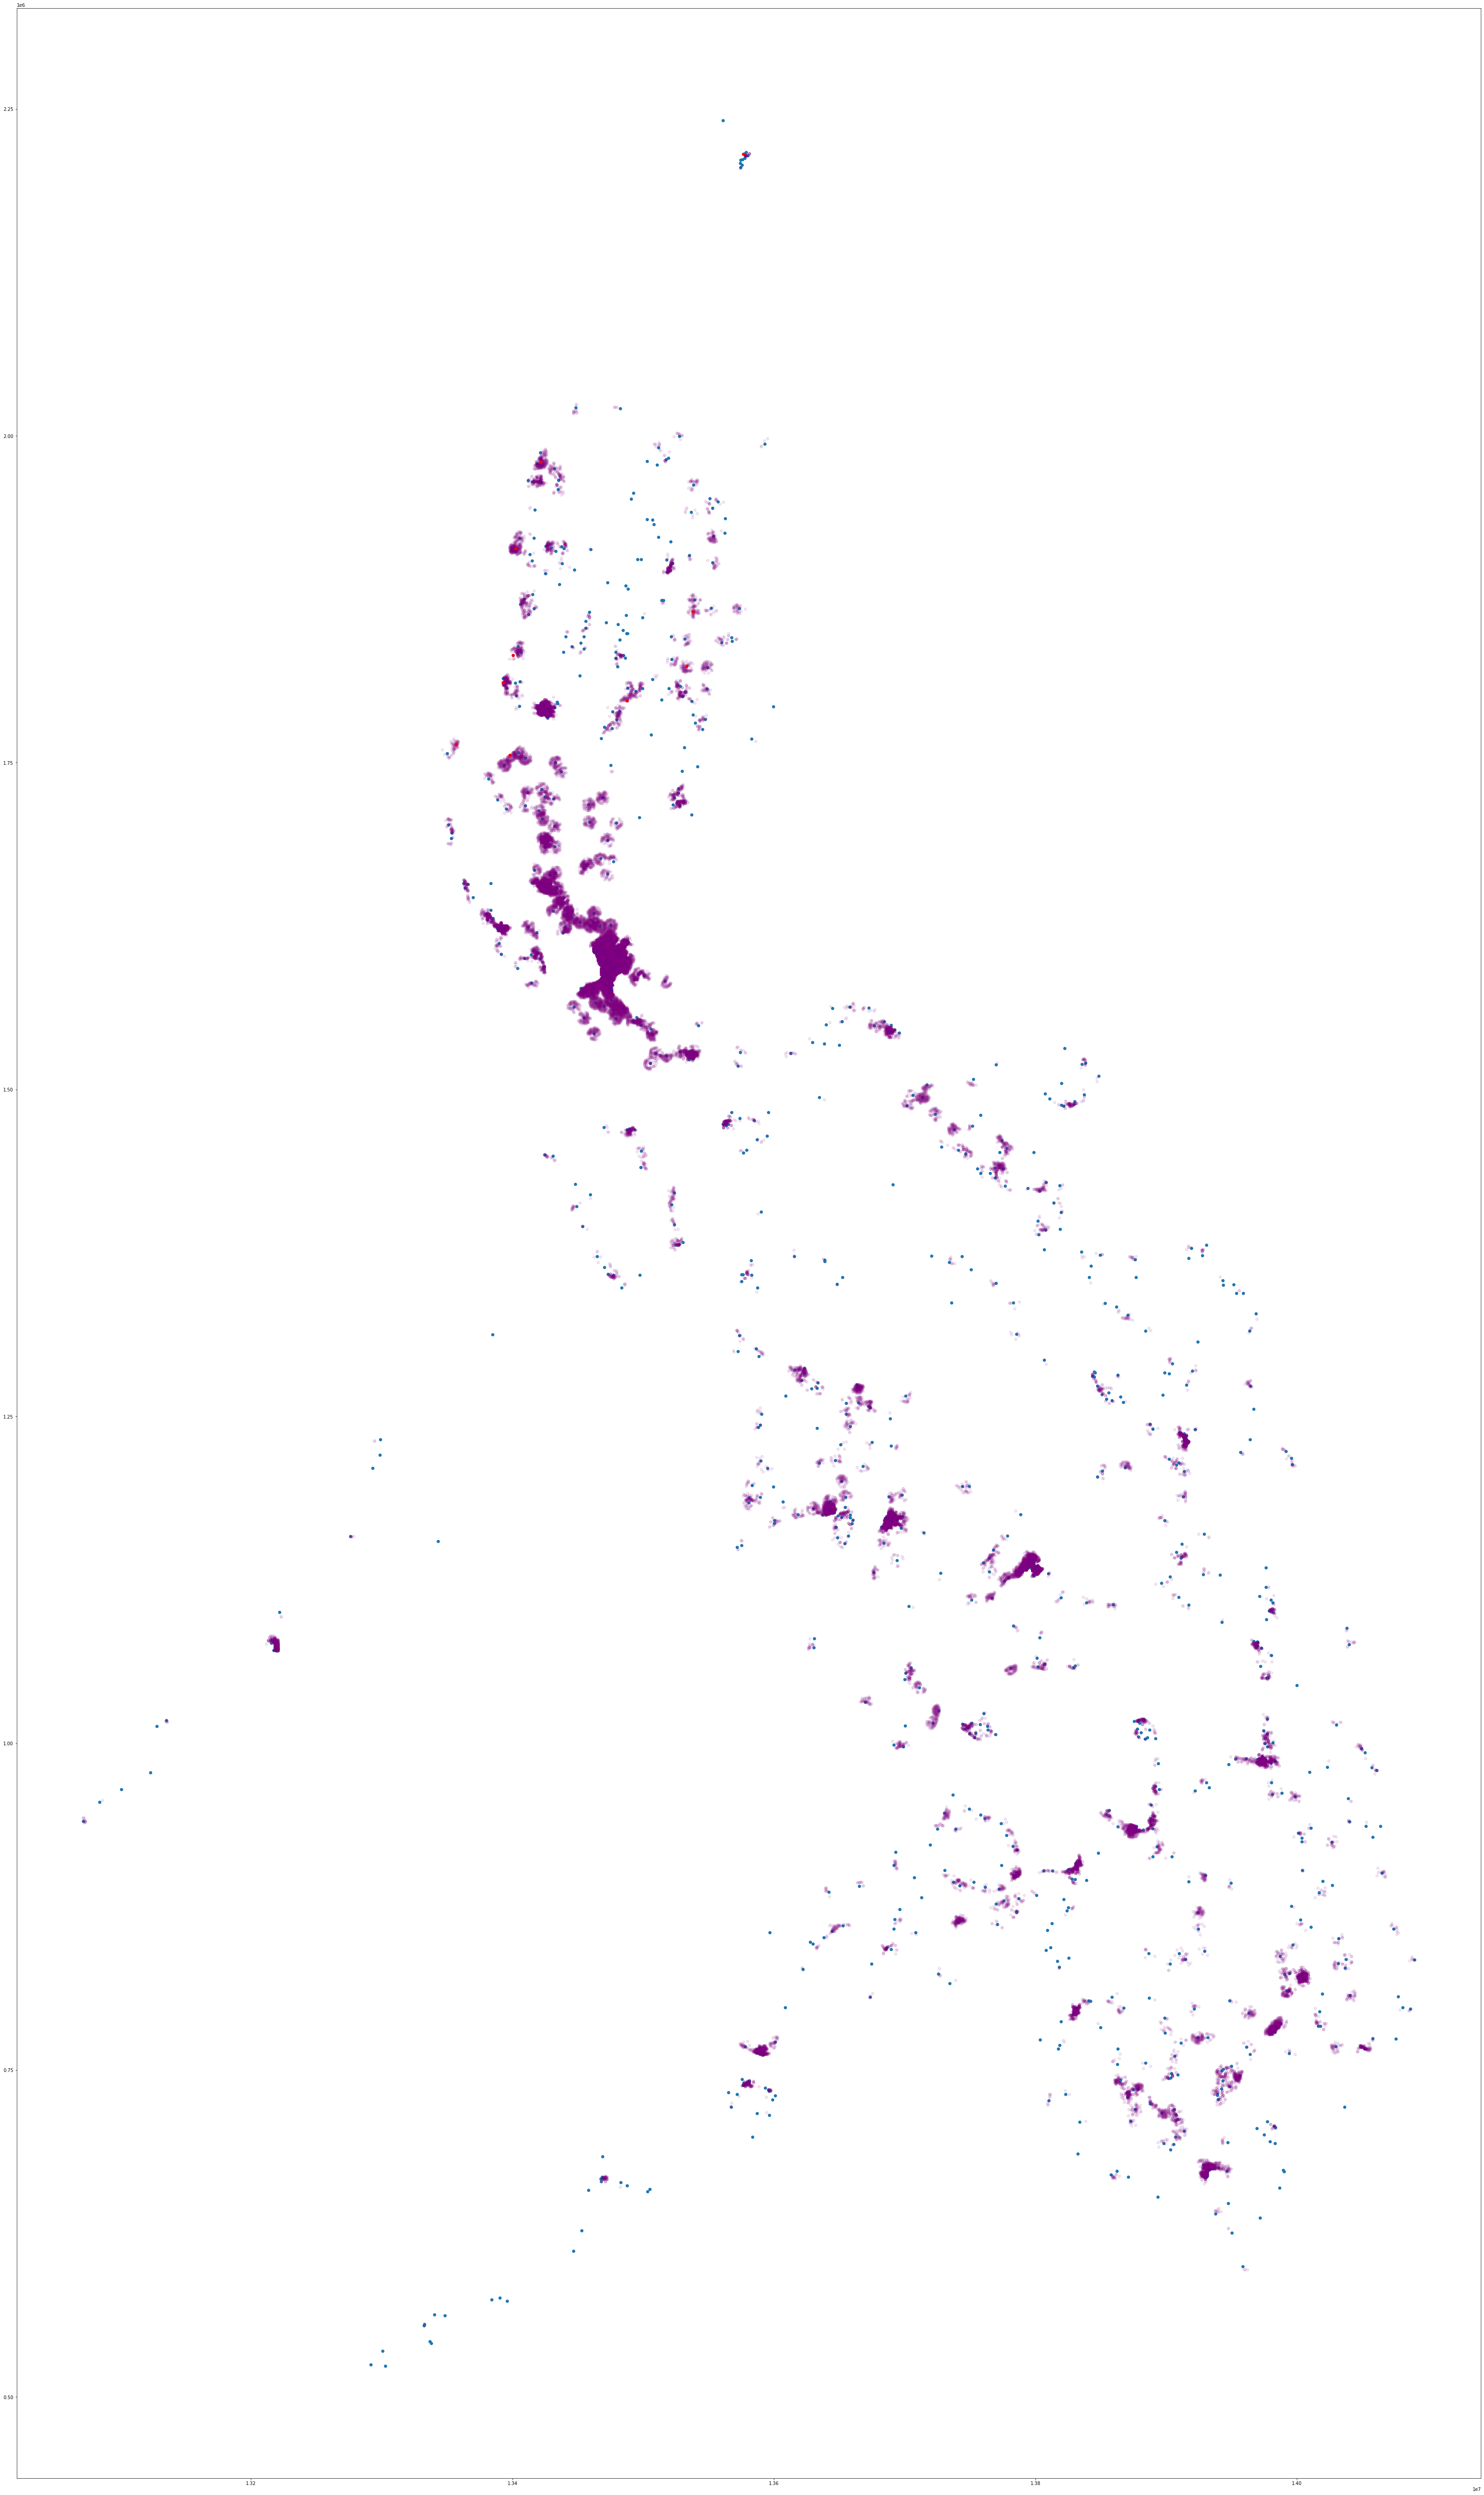

In [12]:
fig, ax = plt.subplots(figsize=(100,100))
# ph_fixed_tiles.plot(ax=ax)
centroids_.plot(ax=ax)

avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis = [], [], [], [], [], [], [], []

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
for i in range(len(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    intpoint_test.plot(ax=ax, color='purple', alpha=0.1)
    summary_stat(intpoint_test.avg_d_kbps, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_u_kbps, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis)
    summary_stat(intpoint_test.avg_lat_ms, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis)

centroids_[:10].plot(ax=ax, color='red')


# buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
# data_in_buffers = gp.sjoin(ph_fixed_tiles, buffers_, how='inner', op='within')